# Demos of time conversion for some netCDF model output files

##### Note: this is written for two different COAMPS forcing files, which are not quite the same as a COAWST `his` file.

In [1]:
import netCDF4 as nc4
import numpy as np

### Read in a COAMPS reanalysis file from 
https://coastwatch.pfeg.noaa.gov/erddap/info/nrlCOAMPS3kmNogap/index.html

In [2]:
filename = 'https://oceanview.pfeg.noaa.gov/thredds/dodsC/Model/COAMPS/sfc_3km_gap_free'
with nc4.Dataset(filename) as nc:
    print(nc.dimensions)
    print(nc.variables)

OrderedDict([('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 319
), ('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 220
), ('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1464
)])
OrderedDict([('lat_coamps', <class 'netCDF4._netCDF4.Variable'>
float32 lat_coamps(lat, lon)
    units: degrees_north
    long_name: Latitude
    add_offset: 0.0
    scale_factor: 1.0
unlimited dimensions: 
current shape = (319, 220)
filling off
), ('lon_coamps', <class 'netCDF4._netCDF4.Variable'>
float32 lon_coamps(lat, lon)
    units: degrees_east
    long_name: Longitude
    add_offset: 0.0
    scale_factor: 1.0
unlimited dimensions: 
current shape = (319, 220)
filling off
), ('airtmp', <class 'netCDF4._netCDF4.Variable'>
float32 airtmp(time, lat, lon)
    missing_value: -9999.0
    units: deg C
    scale_factor: 1.0
    add_offset: 0.0
unlimited dimensions: 
current shape = (1464, 319, 220)
filling off
), ('grdtmp', <class 'netCDF4._netCDF4.Varia

In [3]:
nc = nc4.Dataset(filename)
lon = nc['lon_coamps'][:,:]
lat = nc['lat_coamps'][:,:]
Uwind = nc['uwind'][:,:,:]
Vwind = nc['vwind'][:,:,:]
time = nc['time'][:]
time[0]

151.0

## Convert U and V wind components to magnitude and direction

In [4]:
np.shape(Uwind)

(1464, 319, 220)

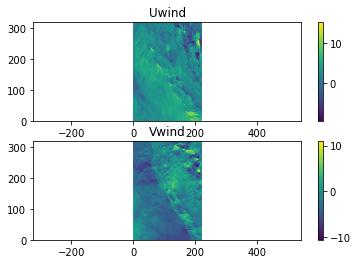

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax0, ax1) = plt.subplots(nrows=2)
im0 = ax0.pcolormesh(Uwind[1,:,:])
ax0.axis('equal')
ax0.set_title('Uwind')
fig.colorbar(im0, ax=ax0)
im1 = ax1.pcolormesh(Vwind[1,:,:])
ax1.axis('equal')
ax1.set_title('Vwind')
fig.colorbar(im1, ax=ax1)

In [6]:
mag = np.sqrt(Uwind**2 + Vwind**2)

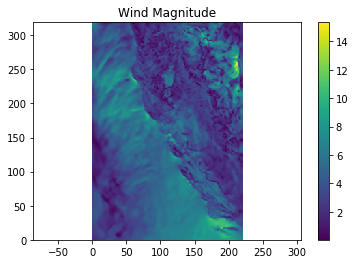

In [7]:
fig, ax = plt.subplots()
im = ax.pcolormesh(mag[1,:,:])
ax.axis('equal')
ax.set_title('Wind Magnitude')
fig.colorbar(im, ax=ax)

In [8]:
np.shape(mag)

(1464, 319, 220)

### Conversion functions for two common time stamps

In [9]:
import netCDF4
def epictime2dt(nc):
    millisecond_units = 'milliseconds since 1858-11-17T00:00:00Z'
    time_data = netCDF4.num2date((np.int64(nc.variables['time'][:])-2400001)*3600*24*1000 +\
        nc.variables['time2'][:].__array__(), units=millisecond_units)
    return time_data

def COAMPS_nctime2dt(nc):
    'Days since 2009-01-01 00 UTC'
    day_units = 'days since 2009-01-01T00:00:00Z'
    time_data = netCDF4.num2date(nc['time'][:],units=day_units)
    return time_data

In [10]:
time_data = COAMPS_nctime2dt(nc)
print("Date time object: ",'{:%m/%d/%Y %H:%M:%S}'.format(time_data[0]))
print("Date time object: ",'{:%m/%d/%Y %H:%M:%S}'.format(time_data[-1]))

Date time object:  06/01/2009 00:00:00
Date time object:  07/31/2009 23:00:03


## Demo: define a special time conversion for odd time stamp

In [11]:
# This is the file that Christie was looking at:
filename = 'COAMPS_winds_3hour_Sandy.nc'
with nc4.Dataset(filename) as nc:
    print(nc.dimensions)
    print(nc.variables)

OrderedDict([('xrho', <class 'netCDF4._netCDF4.Dimension'>: name = 'xrho', size = 1301
), ('yrho', <class 'netCDF4._netCDF4.Dimension'>: name = 'yrho', size = 1001
), ('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 63
), ('wind_time', <class 'netCDF4._netCDF4.Dimension'>: name = 'wind_time', size = 63
)])
OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: atmospheric forcing time
    units: days
    field: time, scalar, series
unlimited dimensions: 
current shape = (63,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lon', <class 'netCDF4._netCDF4.Variable'>
float64 lon(yrho, xrho)
    long_name: longitude
    units: degrees_east
    field: xp, scalar, series
unlimited dimensions: 
current shape = (1001, 1301)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('lat', <class 'netCDF4._netCDF4.Variable'>
float64 lat(yrho, xrho)
    long_name: latitude
    units: degrees_north
    field: yp, sca

In [12]:
nc = nc4.Dataset(filename)
time = nc['time'][:]
wind_time = nc['wind_time'][:]
time[0]

56222.75

### Define a time-conversion function for John and Christie's COAMPS forcing files
The time is in Matlab datenum days, minus Matlab datenum(1858,11,17) = 678942


In [13]:
def SandyFRC_nctime2dt(nc):
    # Special time offset for these files
    day_units = 'days since 1858-11-17T00:00:00Z'
    time_data = netCDF4.num2date(nc['time'][:],units=day_units)
    return time_data

In [14]:
time_data = SandyFRC_nctime2dt(nc)
print("Date time object: ",'{:%m/%d/%Y %H:%M:%S}'.format(time_data[0]))
print("Date time object: ",'{:%m/%d/%Y %H:%M:%S}'.format(time_data[-1]))

Date time object:  10/22/2012 18:00:00
Date time object:  10/30/2012 12:00:00
